In [1]:
import math

import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import cauchy, norm

plt.rcParams.update({"font.size": 14})

# Testing the pseudo-random generator

### Mean of the Uniform Random Number Generator

I used code similar to what was provided in the assignment notebook to calculate the following integrals. 

$\langle r \rangle = \int_0^1 r dr = 1/2 $ 

$\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$

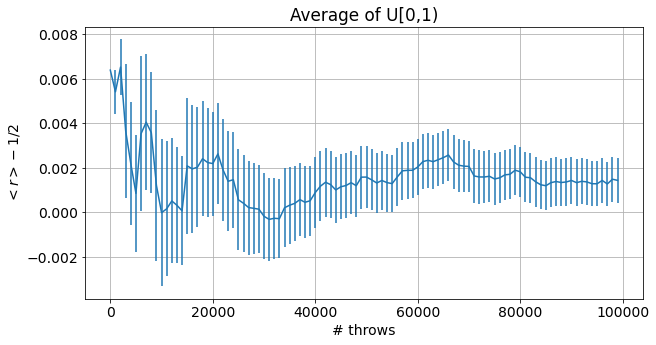

In [2]:
M = 100000  # Throws
N = 100  # Blocks (~ Experiments)
L = int(M / N)  # Rolls per block

avg, err = np.loadtxt("./data/first_integral.dat", usecols=(0, 2), delimiter=" ", unpack="true")

x = np.arange(N) * L  # coordinates of each error bar
plt.figure(figsize=(10, 5))
plt.grid(True)
plt.errorbar(x, avg - 0.5, yerr=err)
plt.xlabel("# throws")
plt.ylabel(r"$<r>-1/2$")
plt.title("Average of U[0,1)")
plt.show()

**Figure: Blocked average of uniformly distributed random numbers.**

### Variance of the Random Number Generator

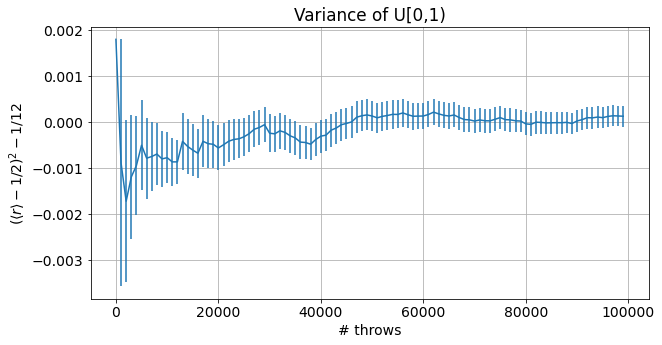

In [3]:
M = 100000  # Throws
N = 100  # Blocks
L = int(M / N)  # Rolls per block

avg, err = np.loadtxt("./data/second_integral.dat", usecols=(0, 2), delimiter=" ", unpack="true")

# Plot (experimental value - expected value)

x = np.arange(N) * L
plt.figure(figsize=(10, 5))
plt.grid(True)
plt.errorbar(x, avg - 1 / 12, yerr=err)
plt.xlabel("# throws")
plt.ylabel(r"$(\langle r \rangle - 1/2)^2 - 1/12$")
plt.title("Variance of U[0,1)")
plt.show()

**Figure: Blocked variance of uniformly distributed random numbers.**

### Chi Squared Test

This chi-squared test checks if the error between observations and hypothesis are compatible with expected statistical fluctuations.

$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$

In this problem we create $M=100$ different subintervals in the range $[0,1]$. For each subinterval, we generate $n=10,000$ and count those that lie within the subinterval.

If the uniform random number generator is truly uniform, then we will count $n/M$ random numbers in each subinterval. 

The chi-squared test we perform will assess if our hypothesis is true.

$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$

If our hypothesis is correct then $\left( n_i - n/M \right)^2 \simeq n/M$ and $\chi^2 = 100$.

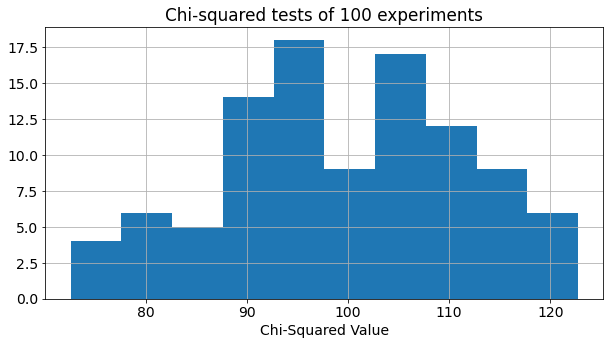

In [3]:
# Chi Squared Test

chi2 = np.loadtxt("./data/chi_squared.dat", usecols=(0), delimiter=" ", unpack="true")

# Plot the results
plt.figure(figsize=(10, 5))
plt.hist(chi2)
# plt.ylabel("Chi-Squared Value - 100")
plt.xlabel("Chi-Squared Value")
plt.title("Chi-squared tests of 100 experiments")
plt.grid(True)
# plt.savefig("./figs/1.1.3.png")
plt.show()

**Figure: Many chi-squared tests.**

# The Central Limit Theorem: Uniform, Exponential, and Cauchy-Lorentz Distributions

The central limit theorem says that the sum of identical, indipendently distributed random variables with finite variance $(\mu, \sigma^2)$converges to a normal distribution with $\mu_S = \mu$ and $\sigma_S = \frac{\sigma}{\sqrt{N}}$.

Here we test this theorem with three different distributions: uniform, exponential, and lorentzian.

The Cauchy-Lorentz distribution has infinite variance and the central limit theorem is not valid in its case. However, it is a "stable" distribution that obeys its own form of the central limit theorem. 

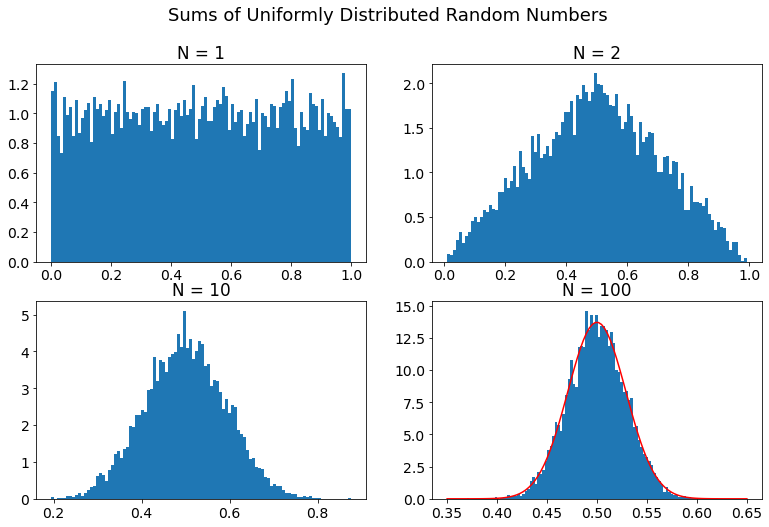

Fit : 0.49987827230000004 0.029099044987579106
Prediction : 0.5 0.028867513459481284


In [3]:
# Uniform Distribution with CLT Test

datafile = "./data/clt_uniform.dat"

sums1, sums2, sums10, sums100 = np.loadtxt(datafile, usecols=(0, 1, 2, 3), delimiter=" ", unpack="true")

fig, axes = plt.subplots(2, 2, figsize=(13, 8))
fig.suptitle("Sums of Uniformly Distributed Random Numbers", fontsize=18)

axes[0, 0].hist(sums1, bins=100, density=True)
axes[0, 0].title.set_text("N = 1")

axes[0, 1].hist(sums2, bins=100, density=True)
axes[0, 1].title.set_text("N = 2")

axes[1, 0].hist(sums10, bins=100, density=True)
axes[1, 0].title.set_text("N = 10")

axes[1, 1].hist(sums100, bins=100, density=True)
axes[1, 1].title.set_text("N = 100")

# plt.tight_layout()

data = sums100
mean, std_dev = norm.fit(data)
x = np.linspace(0.35, 0.65, 100)
gauss_fit = norm.pdf(x, loc=mean, scale=std_dev)
axes[1, 1].plot(x, gauss_fit, color="red")
# plt.savefig("./figs/1.2.1.png")
plt.show()
print("Fit :", mean, std_dev)
print("Prediction :", 0.5, (1 / np.sqrt(100 * 12)))

**RNG method: Inversion of CDF**

$ x = − \frac{1}{\lambda}ln(1 − y), \, y \in U[0,1)$

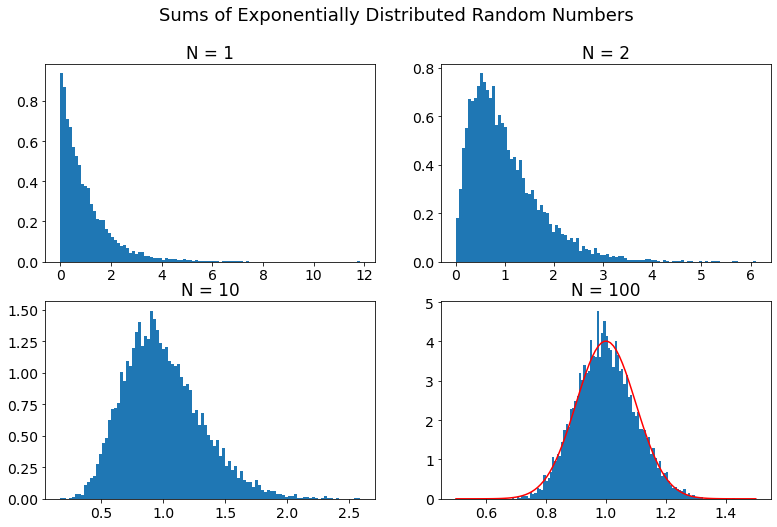

Fit : 1.0003160161 0.09946984434617077
Prediction : 1 0.1


In [4]:
# Exponential Distribution with CLT Test

datafile = "./data/clt_exponential.dat"

sums1, sums2, sums10, sums100 = np.loadtxt(datafile, usecols=(0, 1, 2, 3), delimiter=" ", unpack="true")

fig, axes = plt.subplots(2, 2, figsize=(13, 8))
fig.suptitle("Sums of Exponentially Distributed Random Numbers", fontsize=18)

axes[0, 0].hist(sums1, bins=100, density=True)
axes[0, 0].title.set_text("N = 1")
axes[0, 1].hist(sums2, bins=100, density=True)
axes[0, 1].title.set_text("N = 2")

axes[1, 0].hist(sums10, bins=100, density=True)
axes[1, 0].title.set_text("N = 10")
axes[1, 1].hist(sums100, bins=100, density=True)
axes[1, 1].title.set_text("N = 100")

data = sums100
mean, std_dev = norm.fit(data)
x = np.linspace(0.5, 1.5, 100)
gauss_fit = norm.pdf(x, mean, std_dev)
axes[1, 1].plot(x, gauss_fit, color="red")
# plt.savefig("./figs/1.2.2.png")
plt.show()

print("Fit :", mean, std_dev)
print("Prediction :", 1, (1 / np.sqrt(100)))

**RNG method: Inversion of CDF**

$ r = \gamma \,  tan(\pi \, (y - 0.5) ) - \mu $

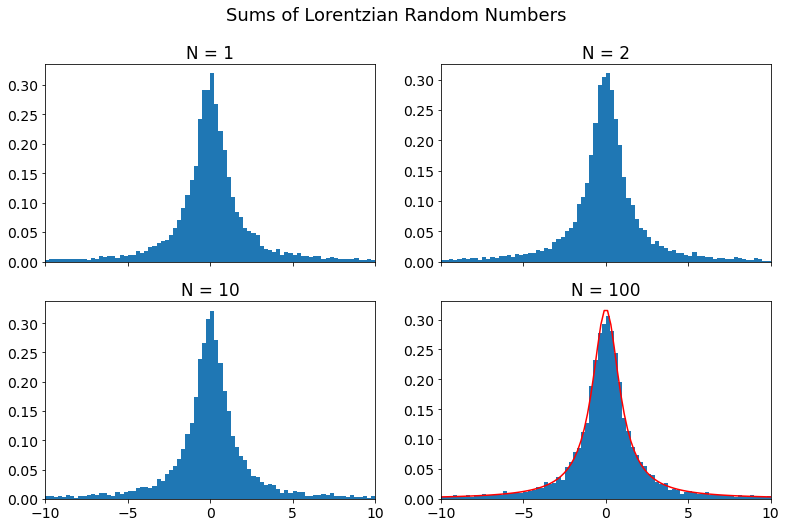

In [5]:
# The Cauchy-Lorentz Distribution, a stable distribution

datafile = "./data/clt_lorentzian.dat"

sums1, sums2, sums10, sums100 = np.loadtxt(datafile, usecols=(0, 1, 2, 3), delimiter=" ", unpack="true")

sums1 = np.clip(sums1, -25, 25)
sums2 = np.clip(sums2, -25, 25)
sums10 = np.clip(sums10, -25, 25)
sums100 = np.clip(sums100, -25, 25)

fig, axes = plt.subplots(2, 2, figsize=(13, 8), sharex=True)
fig.suptitle("Sums of Lorentzian Random Numbers", fontsize=18)

axes[0, 0].hist(sums1, bins=200, density=True)
axes[0, 0].title.set_text("N = 1")
axes[0, 0].set_xlim([-10, 10])

axes[0, 1].hist(sums2, bins=200, density=True)
axes[0, 1].title.set_text("N = 2")
axes[0, 1].set_xlim([-10, 10])

axes[1, 0].hist(sums10, bins=200, density=True)
axes[1, 0].title.set_text("N = 10")
axes[1, 0].set_xlim([-10, 10])

axes[1, 1].hist(sums100, bins=200, density=True)
axes[1, 1].title.set_text("N = 100")
axes[1, 1].set_xlim([-10, 10])

x = np.linspace(-10, 10, 100)
cauchy_fit = cauchy.pdf(x)
axes[1, 1].plot(x, cauchy_fit, color="red")
# plt.savefig("./figs/1.2.3.png")
plt.show()

# The Buffon Experiment 

Here we simulate the Buffon experiment, a method for calculating pi experimentally.

$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$

I used the following parameters:
- d = 10 (gridline spacing)
- L = 5 (needle length)
- M = 100 (number of blocks)
- N = 1,000,000 (throws per block)
- periodic boundary conditions

```c++
for (int i = 0; i < M; i++) { // loop over M blocks
  hits = 0;
  for (int j = 0; j < N; j++) { // drop N needles per block
      
    y1 = d * rnd.Rannyu();     // place one end of the needle (only y-coordinate)
    t = rnd.RanTheta();        // needle rotation
    y2 = y1 + length * sin(t); // calculate the other end

    if ((y2 < 0 || y2 > 10)) { // check for hits
      hits += 1;
    }
  pi_estimate = make_pi(hits, T, d, length);
}
```

Final estimate for pi: 3.14166 +/- 0.000463 ( 0.014751 % )


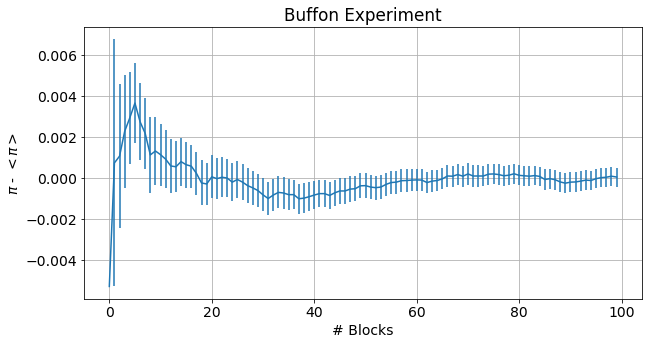

In [7]:
datafile = "./data/buffon.dat"
pi_est, err = np.loadtxt(datafile, usecols=(0, 2), delimiter=" ", unpack="true")

pi_result = pi_est[99]
pi_error = err[99]
pi_perror = round(pi_error / pi_result * 100, 6)
pi_error = round(err[99], 6)
print("Final estimate for pi:", pi_result, "+/-", pi_error, "(", pi_perror, "% )")

x = np.arange(100)
plt.figure(figsize=(10, 5))
plt.errorbar(x, pi_est - np.pi, yerr=err)
plt.xlabel("# Blocks")
plt.ylabel(r"$\pi$ - $<\pi>$")
plt.title("Buffon Experiment")
plt.grid(True)
# plt.savefig("./figs/1.3.png")
plt.show()